<a href="https://colab.research.google.com/github/pullz6/Retail_Prediction/blob/main/Retail_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!pip install opendatasets

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import opendatasets as od
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt

In [4]:
od.download("https://www.kaggle.com/datasets/yasserh/walmart-dataset?resource=download")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pulsaragunawardhana
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/yasserh/walmart-dataset


100%|██████████| 122k/122k [00:00<00:00, 63.9MB/s]

In [37]:
df=pd.read_csv("/content/walmart-dataset/Walmart.csv")

In [38]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [40]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [41]:
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [43]:
df.sort_values(by='Date',inplace=True)

In [44]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

def find_season(month):
        season_month = {
            12:'Winter', 1:'Winter', 2:'Winter',
            3:'Spring', 4:'Spring', 5:'Spring',
            6:'Summer', 7:'Summer', 8:'Summer',
            9:'Autumn', 10:'Autumn', 11:'Autumn'}
        return season_month.get(month)

season_list = []
for month in df['Month']:
    season = find_season(month)
    season_list.append(season)

df['Season'] = season_list

Text(17.19444444444445, 0.5, 'Weekly Sales')

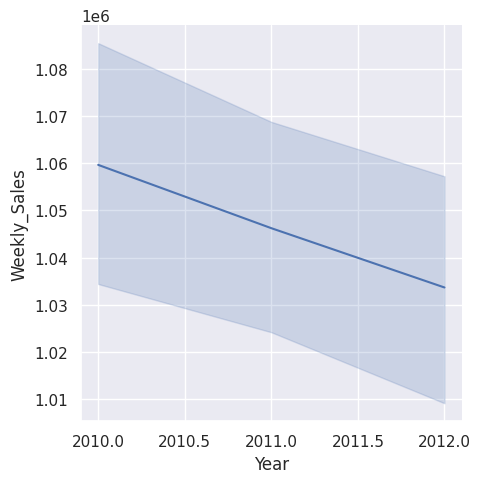

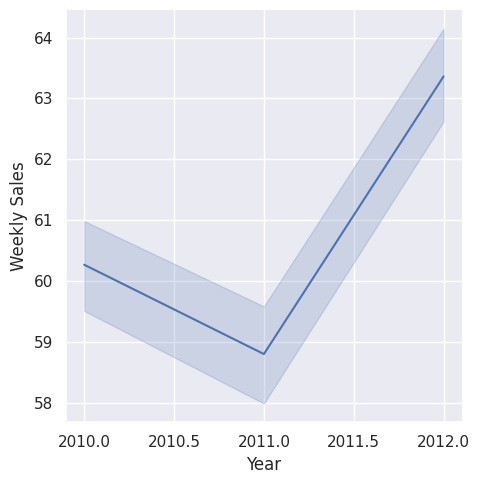

In [28]:
sns.relplot(data=df, x="Year", y="Weekly_Sales", kind="line")
sns.relplot(data=df, x="Year", y="Temperature", kind="line")
plt.xlabel('Year')
plt.ylabel('Weekly Sales')

Text(12.444444444444452, 0.5, 'Weekly Sales')

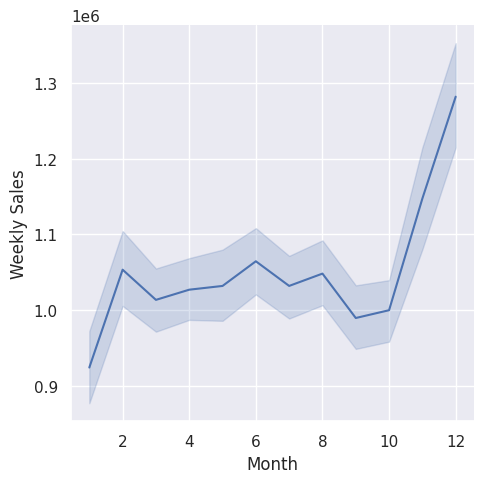

In [29]:
sns.relplot(data=df, x="Month", y="Weekly_Sales", kind="line")
plt.xlabel('Month')
plt.ylabel('Weekly Sales')

Text(2.8194444444444517, 0.5, 'Weekly Sales')

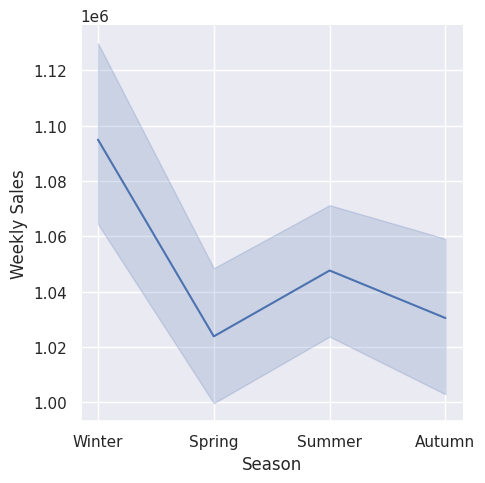

In [45]:
sns.relplot(data=df, x="Season", y="Weekly_Sales", kind="line")
plt.xlabel('Season')
plt.ylabel('Weekly Sales')